# West Virginia Mountaineers Football Team History

Loaded the table for the football team's statistics for the 106 years they have been playing.  Let's Go Mountaineers!

First import the modules needed.

In [1]:
import requests
import pandas as pd
import sqlite3
import lxml.html as lh

Get the data from the website.

In [2]:
r = requests.get("https://www.sports-reference.com/cfb/schools/west-virginia/")

In [ ]:
#r.text    #Verified that data loaded.  Commented out for final submission. 

Inspect the data that was downloaded to look for the relationships and find what is needed.

In [3]:
html = lh.fromstring(r.text)

In [4]:
html

<Element html at 0x246c8d0b598>

In [5]:
html      = lh.fromstring(r.text)
wvu_table = html.get_element_by_id("all_west-virginia")
tablebody = wvu_table.getchildren()[1].getchildren()[0].getchildren()[0].getchildren()[3]

In [6]:
wvu_table

<Element div at 0x246c8d0bb38>

Look for the table data

In [7]:
wvu_table.getchildren()[1].getchildren()[0].getchildren()[0].getchildren()[3]   # Here is the table body so I assigned this to the variable above

<Element tbody at 0x246c8d41048>

In [8]:
tablebody.getchildren()         # These are the table rows

[<Element tr at 0x246c8d0b728>,
 <Element tr at 0x246c8d41098>,
 <Element tr at 0x246c8d411d8>,
 <Element tr at 0x246c8d41188>,
 <Element tr at 0x246c8d412c8>,
 <Element tr at 0x246c8d41318>,
 <Element tr at 0x246c8d41368>,
 <Element tr at 0x246c8d413b8>,
 <Element tr at 0x246c8d41408>,
 <Element tr at 0x246c8d41458>,
 <Element tr at 0x246c8d414a8>,
 <Element tr at 0x246c8d414f8>,
 <Element tr at 0x246c8d41548>,
 <Element tr at 0x246c8d41598>,
 <Element tr at 0x246c8d415e8>,
 <Element tr at 0x246c8d41638>,
 <Element tr at 0x246c8d41688>,
 <Element tr at 0x246c8d416d8>,
 <Element tr at 0x246c8d41728>,
 <Element tr at 0x246c8d41778>,
 <Element tr at 0x246c8d417c8>,
 <Element tr at 0x246c8d41818>,
 <Element tr at 0x246c8d41868>,
 <Element tr at 0x246c8d418b8>,
 <Element tr at 0x246c8d41908>,
 <Element tr at 0x246c8d41958>,
 <Element tr at 0x246c8d419a8>,
 <Element tr at 0x246c8d419f8>,
 <Element tr at 0x246c8d41a48>,
 <Element tr at 0x246c8d41a98>,
 <Element tr at 0x246c8d41ae8>,
 <Elemen

In [9]:
tablebody.getchildren().getchildren()    # I cannot get the table data from the table rows using the method in the videos 
                                         # because each table has a table header (th) as the first column before the td columns. I need a different method.
                                         # https://towardsdatascience.com/web-scraping-html-tables-with-python-c9baba21059

AttributeError: 'list' object has no attribute 'getchildren'

In [10]:
tr_elements = html.xpath('//tr')            # Parse the data between the tr at the beginning and end of the row

In [11]:
[len(T) for T in tr_elements[:12]]          # Check to see that all rows have the same width.

[15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15]

In [12]:
# Create and empty list
col=[]
i=0
# For each row, store each first element (header) and an empty list
for t in tr_elements[0]:
    i+=1
    name=t.text_content()
    print(i,name)
    col.append((name,[]))

1 Rk
2 Year
3 Conf
4 W
5 L
6 T
7 Pct
8 SRS
9 SOS
10 AP Pre
11 AP High
12 AP Post
13 Coach(es)
14 Bowl
15 Notes


In [13]:
#Since out first row is the header, data is stored on the second row onwards
for j in range(1,len(tr_elements)):
    #T is our j'th row
    T=tr_elements[j]
    
    #If row is not of size 15, the //tr data is not from our table 
    if len(T)!=15:
        break
    
    #i is the index of our column
    i=0
    
    #Iterate through each element of the row
    for t in T.iterchildren():
        data=t.text_content() 
        #Check if row is empty
        if i>0:
        #Convert any numerical value to integers
            try:
                data=int(data)
            except:
                pass
        #Append the data to the empty list of the i'th column
        col[i][1].append(data)
        #Increment i for the next column
        i+=1

In [14]:
[len(C) for (title,C) in col]         # All rows are the same length.  Would expect 106 
                                      # Have 5 extra rows.  Need to see why.

[111, 111, 111, 111, 111, 111, 111, 111, 111, 111, 111, 111, 111, 111, 111]

In [15]:
Dict={title:column for (title,column) in col}           # Create the dataframe
df=pd.DataFrame(Dict)

In [16]:
df.head()

,Rk,Year,Conf,W,L,T,Pct,SRS,SOS,AP Pre,AP High,AP Post,Coach(es),Bowl,Notes
0,1,2018,Big 12,8,1,0,.889,17.25,2.25,17,6,,Dana Holgorsen (8-1),,
1,2,2017,Big 12,7,6,0,.538,4.84,3.07,22,22,,Dana Holgorsen (7-6),Heart of Dallas Bowl-L,
2,3,2016,Big 12,10,3,0,.769,9.57,2.03,,10,18,Dana Holgorsen (10-3),Russell Athletic Bowl-L,
3,4,2015,Big 12,8,5,0,.615,7.59,2.21,,23,,Dana Holgorsen (8-5),Cactus Bowl-W,
4,5,2014,Big 12,7,6,0,.538,8.07,4.45,,20,,Dana Holgorsen (7-6),Liberty Bowl-L,


In [17]:
df.describe()

,Rk,Year,Conf,W,L,T,Pct,SRS,SOS,AP Pre,AP High,AP Post,Coach(es),Bowl,Notes
count,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111
unique,107,107,5,12,11,5,45,106,100,15,23,15,81,27,2
top,Rk,Year,Ind,8,4,0,.500,SRS,SOS,,,,,,
freq,5,5,60,19,27,78,7,5,5,88,65,87,8,70,106


In [18]:
df              # Looks like the page break headers from the website were brought in as records; 
                # confirm and then if so delete.

,Rk,Year,Conf,W,L,T,Pct,SRS,SOS,AP Pre,AP High,AP Post,Coach(es),Bowl,Notes
0,1,2018,Big 12,8,1,0,.889,17.25,2.25,17,6,,Dana Holgorsen (8-1),,
1,2,2017,Big 12,7,6,0,.538,4.84,3.07,22,22,,Dana Holgorsen (7-6),Heart of Dallas Bowl-L,
2,3,2016,Big 12,10,3,0,.769,9.57,2.03,,10,18,Dana Holgorsen (10-3),Russell Athletic Bowl-L,
3,4,2015,Big 12,8,5,0,.615,7.59,2.21,,23,,Dana Holgorsen (8-5),Cactus Bowl-W,
4,5,2014,Big 12,7,6,0,.538,8.07,4.45,,20,,Dana Holgorsen (7-6),Liberty Bowl-L,
5,6,2013,Big 12,4,8,0,.333,-3.74,2.10,,,,Dana Holgorsen (4-8),,
6,7,2012,Big 12,7,6,0,.538,4.03,4.34,11,5,,Dana Holgorsen (7-6),Pinstripe Bowl-L,
7,8,2011,Big East,10,3,0,.769,8.65,0.96,24,11,17,Dana Holgorsen (10-3),Orange Bowl-W,
8,9,2010,Big East,9,4,0,.692,9.51,0.12,25,20,,Bill Stewart (9-4),Champs Sports Bowl-L,
9,10,2009,Big East,9,4,0,.692,7.48,2.48,,18,25,Bill Stewart (9-4),Gator Bowl-L,


In [19]:
bool_series = df.L == 'L'
duplicates = df[bool_series]
duplicates                                    # These are the duplicated header records

,Rk,Year,Conf,W,L,T,Pct,SRS,SOS,AP Pre,AP High,AP Post,Coach(es),Bowl,Notes
20,Rk,Year,Conf,W,L,T,Pct,SRS,SOS,AP Pre,AP High,AP Post,Coach(es),Bowl,Notes
41,Rk,Year,Conf,W,L,T,Pct,SRS,SOS,AP Pre,AP High,AP Post,Coach(es),Bowl,Notes
62,Rk,Year,Conf,W,L,T,Pct,SRS,SOS,AP Pre,AP High,AP Post,Coach(es),Bowl,Notes
83,Rk,Year,Conf,W,L,T,Pct,SRS,SOS,AP Pre,AP High,AP Post,Coach(es),Bowl,Notes
104,Rk,Year,Conf,W,L,T,Pct,SRS,SOS,AP Pre,AP High,AP Post,Coach(es),Bowl,Notes


In [20]:
WVU_df = df[~bool_series]
WVU_df                                  # This is the dataframe without the duplicates.

,Rk,Year,Conf,W,L,T,Pct,SRS,SOS,AP Pre,AP High,AP Post,Coach(es),Bowl,Notes
0,1,2018,Big 12,8,1,0,.889,17.25,2.25,17,6,,Dana Holgorsen (8-1),,
1,2,2017,Big 12,7,6,0,.538,4.84,3.07,22,22,,Dana Holgorsen (7-6),Heart of Dallas Bowl-L,
2,3,2016,Big 12,10,3,0,.769,9.57,2.03,,10,18,Dana Holgorsen (10-3),Russell Athletic Bowl-L,
3,4,2015,Big 12,8,5,0,.615,7.59,2.21,,23,,Dana Holgorsen (8-5),Cactus Bowl-W,
4,5,2014,Big 12,7,6,0,.538,8.07,4.45,,20,,Dana Holgorsen (7-6),Liberty Bowl-L,
5,6,2013,Big 12,4,8,0,.333,-3.74,2.10,,,,Dana Holgorsen (4-8),,
6,7,2012,Big 12,7,6,0,.538,4.03,4.34,11,5,,Dana Holgorsen (7-6),Pinstripe Bowl-L,
7,8,2011,Big East,10,3,0,.769,8.65,0.96,24,11,17,Dana Holgorsen (10-3),Orange Bowl-W,
8,9,2010,Big East,9,4,0,.692,9.51,0.12,25,20,,Bill Stewart (9-4),Champs Sports Bowl-L,
9,10,2009,Big East,9,4,0,.692,7.48,2.48,,18,25,Bill Stewart (9-4),Gator Bowl-L,


In [21]:
type(WVU_df)

pandas.core.frame.DataFrame

In [22]:
for row in WVU_df.itertuples():                           #This is the data I want in the table in the database
    print(row[1:])

('1', 2018, 'Big 12', 8, 1, 0, '.889', '17.25', '2.25', 17, 6, '', 'Dana Holgorsen (8-1)', '', '')
('2', 2017, 'Big 12', 7, 6, 0, '.538', '4.84', '3.07', 22, 22, '', 'Dana Holgorsen (7-6)', 'Heart of Dallas Bowl-L', '')
('3', 2016, 'Big 12', 10, 3, 0, '.769', '9.57', '2.03', '', 10, 18, 'Dana Holgorsen (10-3)', 'Russell Athletic Bowl-L', '')
('4', 2015, 'Big 12', 8, 5, 0, '.615', '7.59', '2.21', '', 23, '', 'Dana Holgorsen (8-5)', 'Cactus Bowl-W', '')
('5', 2014, 'Big 12', 7, 6, 0, '.538', '8.07', '4.45', '', 20, '', 'Dana Holgorsen (7-6)', 'Liberty Bowl-L', '')
('6', 2013, 'Big 12', 4, 8, 0, '.333', '-3.74', '2.10', '', '', '', 'Dana Holgorsen (4-8)', '', '')
('7', 2012, 'Big 12', 7, 6, 0, '.538', '4.03', '4.34', 11, 5, '', 'Dana Holgorsen (7-6)', 'Pinstripe Bowl-L', '')
('8', 2011, 'Big East', 10, 3, 0, '.769', '8.65', '0.96', 24, 11, 17, 'Dana Holgorsen (10-3)', 'Orange Bowl-W', '')
('9', 2010, 'Big East', 9, 4, 0, '.692', '9.51', '0.12', 25, 20, '', 'Bill Stewart (9-4)', 'Champs Sp

Create the database and populate the table in the database with the data from the pandas dataframe.  Originally did it this way as there is a 
function to convert a pandas dataframe to a database.  But then re-did it using methodology in webscraping demo.

In [23]:
conn = sqlite3.connect('WVU.db')
c = conn.cursor()

WVU_df.to_sql('WVUFinal', conn, if_exists='append', index=False)


C:\Users\sue\Anaconda3\lib\site-packages\pandas\core\generic.py:2130: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  dtype=dtype)


In [24]:
#c.execute('SELECT * FROM WVUFinal').fetchall()                  # This prints everything in the table
c.execute('SELECT Rk, Conf, "Coach(es)" FROM WVUFinal WHERE Conf="Big 12"').fetchall()     # This prints just the selected rows.

[('1', 'Big 12', 'Dana Holgorsen (8-1)'),
 ('2', 'Big 12', 'Dana Holgorsen (7-6)'),
 ('3', 'Big 12', 'Dana Holgorsen (10-3)'),
 ('4', 'Big 12', 'Dana Holgorsen (8-5)'),
 ('5', 'Big 12', 'Dana Holgorsen (7-6)'),
 ('6', 'Big 12', 'Dana Holgorsen (4-8)'),
 ('7', 'Big 12', 'Dana Holgorsen (7-6)')]

In [25]:
c.close()
conn.close()    

This is another way to create the database.

In [26]:
db     = sqlite3.connect(":memory:")
cursor = db.cursor()
cursor.execute("""
    CREATE TABLE WVUSTATS(Rk, Year, Conf, W, L, T, Pct, SRS, SOS, AP_Pre, AP_High, AP_Post, 'Coach(es)', Bowl, Notes)""")

for row in WVU_df.itertuples():
    insert_sql_syntax = """
        INSERT INTO WVUSTATS(Rk, Year, Conf, W, L, T, Pct, SRS, SOS, AP_Pre, AP_High, AP_Post, 'Coach(es)', Bowl, Notes)
        VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)
    """
    cursor.execute(insert_sql_syntax, row[1:])
db.commit()


In [27]:
for row in cursor.execute("""
   SELECT Rk, Year, Conf, W, L, T, Pct
   FROM WVUSTATS 
   WHERE Conf = 'Big East'
"""):
    print(row)

('8', 2011, 'Big East', 10, 3, 0, '.769')
('9', 2010, 'Big East', 9, 4, 0, '.692')
('10', 2009, 'Big East', 9, 4, 0, '.692')
('11', 2008, 'Big East', 9, 4, 0, '.692')
('12', 2007, 'Big East', 11, 2, 0, '.846')
('13', 2006, 'Big East', 11, 2, 0, '.846')
('14', 2005, 'Big East', 11, 1, 0, '.917')
('15', 2004, 'Big East', 8, 4, 0, '.667')
('16', 2003, 'Big East', 8, 5, 0, '.615')
('17', 2002, 'Big East', 9, 4, 0, '.692')
('18', 2001, 'Big East', 3, 8, 0, '.273')
('19', 2000, 'Big East', 7, 5, 0, '.583')
('20', 1999, 'Big East', 4, 7, 0, '.364')
('21', 1998, 'Big East', 8, 4, 0, '.667')
('22', 1997, 'Big East', 7, 5, 0, '.583')
('23', 1996, 'Big East', 8, 4, 0, '.667')
('24', 1995, 'Big East', 5, 6, 0, '.455')
('25', 1994, 'Big East', 7, 6, 0, '.538')
('26', 1993, 'Big East', 11, 1, 0, '.917')
('27', 1992, 'Big East', 5, 4, 2, '.545')
('28', 1991, 'Big East', 6, 5, 0, '.545')


In [28]:
#cursor.execute('SELECT * FROM WVUSTATS').fetchall()                  # This prints everything in the table
cursor.execute('SELECT Rk, Conf, "Coach(es)" FROM WVUSTATS WHERE Conf="Big 12"').fetchall()     # This prints just the selected rows.

[('1', 'Big 12', 'Dana Holgorsen (8-1)'),
 ('2', 'Big 12', 'Dana Holgorsen (7-6)'),
 ('3', 'Big 12', 'Dana Holgorsen (10-3)'),
 ('4', 'Big 12', 'Dana Holgorsen (8-5)'),
 ('5', 'Big 12', 'Dana Holgorsen (7-6)'),
 ('6', 'Big 12', 'Dana Holgorsen (4-8)'),
 ('7', 'Big 12', 'Dana Holgorsen (7-6)')]

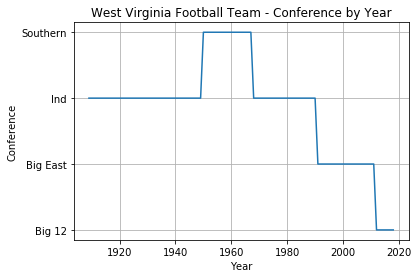

In [30]:
import matplotlib
import matplotlib.pyplot as plt

# Data for plotting
cursor.execute('SELECT Year, Conf FROM WVUSTATS')
t = []
s = []
for row in cursor.fetchall():
    t.append(row[0])
    s.append(row[1])

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='Year', ylabel='Conference',
       title='West Virginia Football Team - Conference by Year')
ax.grid()
fig.savefig("test.png")
plt.show()

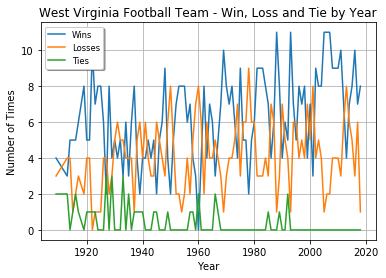

In [31]:
cursor.execute('SELECT Year, W, L, T FROM WVUSTATS')
t = []
s = []
x = []
y = []

for row in cursor.fetchall():
    t.append(row[0])
    s.append(row[1])
    x.append(row[2])
    y.append(row[3])

fig, ax = plt.subplots()
ax.plot(t, s, label='Wins')
ax.plot(t, x, label='Losses')
ax.plot(t, y, label='Ties')

legend = ax.legend(loc='upper left', shadow=True, fontsize='small')

ax.set(xlabel='Year', ylabel='Number of Times',
       title='West Virginia Football Team - Win, Loss and Tie by Year')
ax.grid()

plt.show()

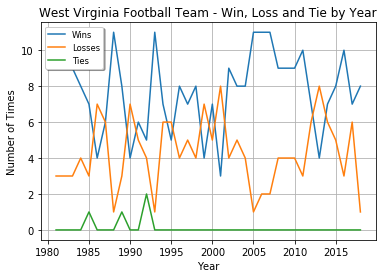

In [32]:
cursor.execute('SELECT Year, W, L, T FROM WVUSTATS WHERE YEAR > 1980')
t = []
s = []
x = []
y = []

for row in cursor.fetchall():
    t.append(row[0])
    s.append(row[1])
    x.append(row[2])
    y.append(row[3])

fig, ax = plt.subplots()
ax.plot(t, s, label='Wins')
ax.plot(t, x, label='Losses')
ax.plot(t, y, label='Ties')

legend = ax.legend(loc='upper left', shadow=True, fontsize='small')

ax.set(xlabel='Year', ylabel='Number of Times',
       title='West Virginia Football Team - Win, Loss and Tie by Year')
ax.grid()

plt.show()

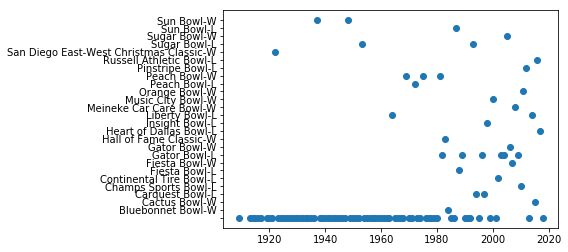

In [33]:
import matplotlib
import matplotlib.pyplot as plt

# Data for plotting
cursor.execute('SELECT Year, Bowl FROM WVUSTATS')
t = []
s = []
for row in cursor.fetchall():
    t.append(row[0])
    s.append(row[1])


plt.scatter(t, s)

plt.show()

Close the session.

In [34]:
cursor.close()
db.close()    
